In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
filename_dict = {
    "white_british": {
        "gsea": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/white_british/gsea_enrich.csv",
        "kegg": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/white_british/kegg_enrich.csv"
        },
    "white_british_male": {
        "gsea": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/white_british_male/gsea_enrich.csv",
        "kegg": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/white_british_male/kegg_enrich.csv"
        },
    "white_british_female": {
        "gsea": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/white_british_female/gsea_enrich.csv",
        "kegg": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/white_british_female/kegg_enrich.csv"
        },
    "post_menopause": {
        "gsea": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/post_menopause/gsea_enrich.csv",
        "kegg": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/post_menopause/kegg_enrich.csv"
        },
    "pre_menopause": {
        "gsea": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/pre_menopause/gsea_enrich.csv",
        "kegg": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/kegg_results/high_bmi/pre_menopause/kegg_enrich.csv"
        },
    "lifestyle_regressed": {
        "gsea": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/bmi_genes_lifestyle_regressed_out/gsea_enrich_high_bmi.csv",
        "kegg": "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/bmi_genes_lifestyle_regressed_out/kegg_enrich_high_bmi.csv"
        }
}

In [4]:
def get_enrich_df(filename, group, ontology_subtype):
    df = pd.read_csv(filename)
    # filter for subtype
    if ontology_subtype:
        df = df.loc[df["ONTOLOGY"]==ontology_subtype]
    df["group"] = group
    return df.reset_index(drop=True)

def create_enrich_df(group_names, ontology_type, ontology_subtype):
    enrich_df_meta = pd.concat([get_enrich_df(filename_dict[group][ontology_type], group, ontology_subtype) for group in group_names]).reset_index(drop=True)
    enrich_df_meta["enrich"] = 1.
    enrich_df_meta["id_with_description"] = enrich_df_meta.ID + "::" + enrich_df_meta.Description.fillna("")
    enrich_df_pivot = enrich_df_meta.pivot(index="id_with_description", columns="group", values="enrich")
    return enrich_df_pivot.fillna(0.)

In [31]:
def save_enriched_heatmaps(enriched_df, figsize, save_file):
    pdf = PdfPages(save_file)
    fig, axes = plt.subplots(figsize=figsize)
    g = sns.heatmap(enriched_df.sort_values(list(enriched_df.columns), ascending=False), linewidths=1.05, ax=axes, cmap="Reds", linecolor="k", cbar=False)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

# KEGG

In [32]:
df_meta_kegg = create_enrich_df(list(filename_dict.keys()), "kegg", "")

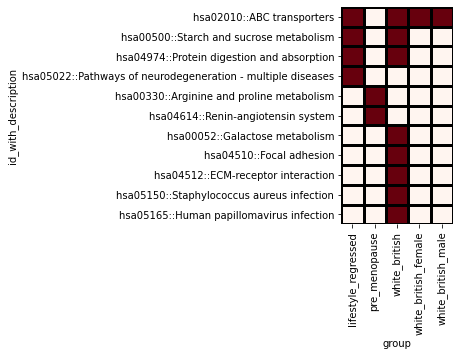

In [33]:
kegg_save_file = "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/figures/heatmaps/kegg.pdf"

save_enriched_heatmaps(df_meta_kegg, (2, 4), kegg_save_file)

# GSEA Molecular Function (MF)

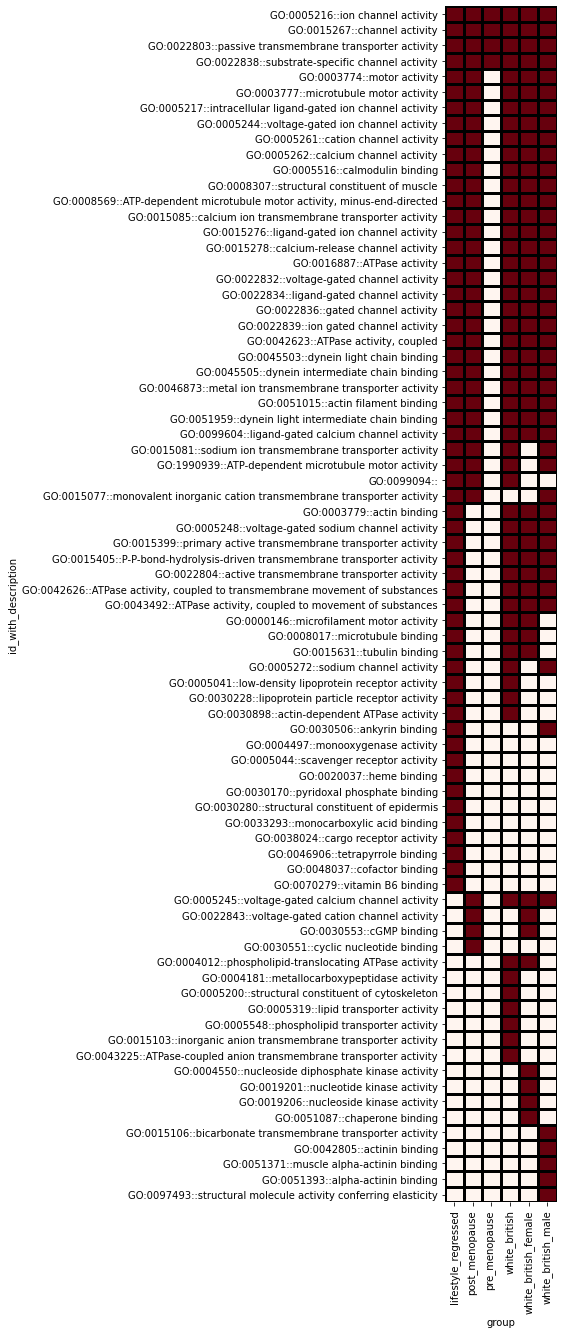

In [34]:
df_meta_mf = create_enrich_df(list(filename_dict.keys()), "gsea", "MF")

mf_save_file = "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/figures/heatmaps/gsea_mf.pdf"

save_enriched_heatmaps(df_meta_mf, (2, 22), mf_save_file)

# GSEA Biological Process (BP)

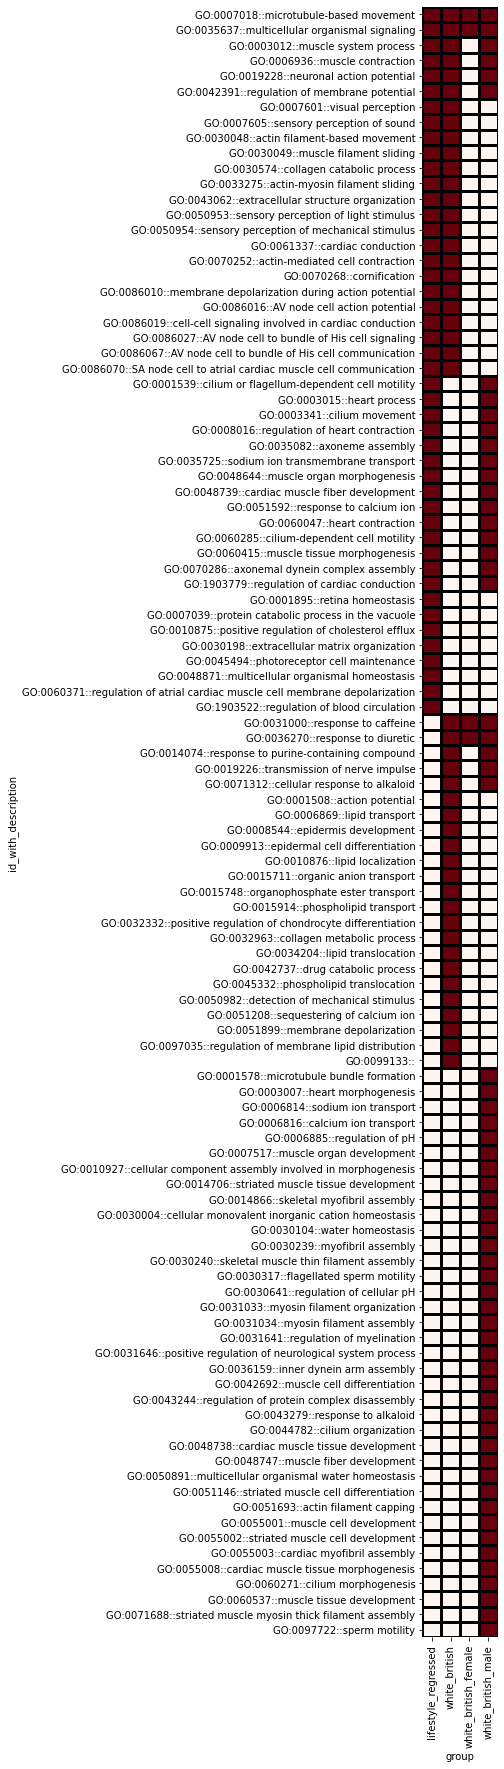

In [35]:
df_meta_bp = create_enrich_df(list(filename_dict.keys()), "gsea", "BP")

bp_save_file = "/data5/deepro/ukbiobank/analysis/bmi_project/bmi_genes_enrichment/data/figures/heatmaps/gsea_bp.pdf"

save_enriched_heatmaps(df_meta_bp, (1.35, 30), bp_save_file)